In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe
from matplotlib.ticker import FormatStrFormatter

import os; print(os.getcwd())

import result_utils

/net/lem/data1/regt/retrieval_base/Luhman_16/figures


In [2]:
name_A = 'Luhman 16A'; name_B = 'Luhman 16B'
color_A = '#FF622E'; color_B = '#396ED8'

lw_d = 0.8
lw_m = 1.35

res_alpha = 0.85

#A_1 = result_utils.RetrievalResults('/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_A_ret_22_1column_n1000/test_')

B_1 = result_utils.RetrievalResults('/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n1000/test_')
B_1.load_components(['d_spec', 'LogLike'])

B_2 = result_utils.RetrievalResults('/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n100_parameterised_shift/test_')
B_2.load_components(['d_spec', 'LogLike'])

B_3 = result_utils.RetrievalResults('/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n100_vdW/test_')
B_3.load_components(['d_spec', 'LogLike'])

/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n1000/test_data
  analysing data from /net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n1000/test_.txt
/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n100_parameterised_shift/test_data
  analysing data from /net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n100_parameterised_shift/test_.txt
/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n100_vdW/test_data
  analysing data from /net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/J_B_ret_62_1column_n100_vdW/test_.txt


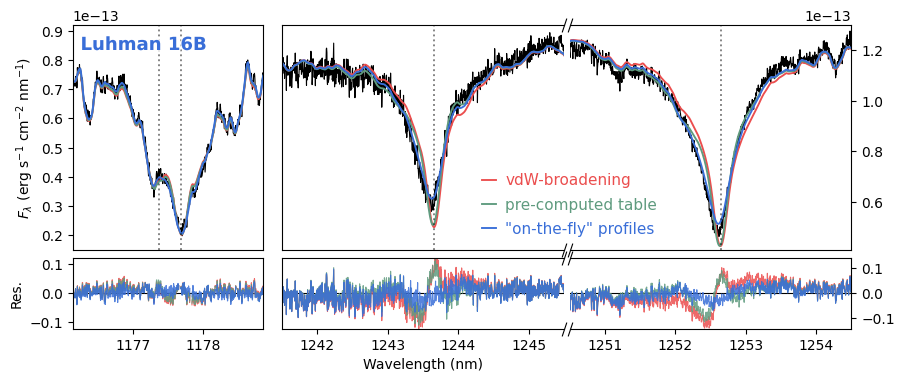

In [6]:
scale = 1e-13
c_1 = '#396ED8'
c_2 = '#5F9B7F'
c_3 = '#EB4E4E'

labels = [
    #r'Parameterised $\gamma_W(P,T)$ and $d(P,T)$', 
    '"on-the-fly" profiles', 
    'pre-computed table', 
    'vdW-broadening', 
]

width = 4
xlim = [
    1177.5 + np.array([-1,1])*width/2*25/37, 
    #1169.4 + np.array([-1,1])*width/2*25/37, 
    1243.5 + np.array([-1,1])*width/2, 
    1252.5 + np.array([-1,1])*width/2
]
ylim = [
    (0.15e-13,0.92e-13), (0.41e-13,1.3e-13), (0.41e-13,1.3e-13), 
    #(0.15e-13,0.85e-13), (0.41e-13,1.0e-13), (0.41e-13,1.0e-13), 
]

fig = plt.figure(figsize=(9,3.8))
gs = fig.add_gridspec(
    nrows=2, ncols=4, hspace=0.05, wspace=0.03, 
    height_ratios=[0.76,0.24], width_ratios=[0.25,0.01,0.37,0.37]
)
ax = np.array([
    fig.add_subplot(gs[0,0]), 
    fig.add_subplot(gs[0,2]), 
    fig.add_subplot(gs[0,3]), 
])
ax_res = np.array([
    fig.add_subplot(gs[1,0]), 
    fig.add_subplot(gs[1,2]), 
    fig.add_subplot(gs[1,3]), 
])

for h, ax_h in enumerate(ax):
    
    ax_h.set(xlim=xlim[h], xticks=[], ylim=ylim[h])

    ylim_h = ax_h.get_ylim()
    h_ratio = gs.get_height_ratios()
    h_ratio = h_ratio[1]/h_ratio[0]
    ylim_res_h = (-np.diff(ylim_h)/scale/2 * h_ratio, +np.diff(ylim_h)/scale/2 * h_ratio)

    ax_res[h].set(xlim=xlim[h], ylim=ylim_res_h)
    ax_res[h].axhline(0, lw=ax_res[h].spines['left'].get_lw(), c='k')

    for i, wave_i in enumerate(B_1.d_spec['J1226_1'].wave):
        
        # Outside of plot range
        if (wave_i < xlim[h][0]).all():
            continue
        if (wave_i > xlim[h][1]).all():
            continue

        # Data
        ax_h.plot(wave_i, B_1.d_spec['J1226_1'].flux[i], c='k', lw=lw_d)
        
        # Models
        label_i = labels[2]
        ax_h.plot(wave_i, B_3.LogLike.m_flux_phi[i], c=c_3, lw=lw_m, label=label_i)
        ax_res[h].plot(
            wave_i, (B_3.d_spec['J1226_1'].flux[i] - B_3.LogLike.m_flux_phi[i])/scale, c=c_3, lw=lw_d, alpha=res_alpha
            )

        label_i = labels[1]
        ax_h.plot(wave_i, B_2.LogLike.m_flux_phi[i], c=c_2, lw=lw_m, label=label_i)
        ax_res[h].plot(
            wave_i, (B_2.d_spec['J1226_1'].flux[i] - B_2.LogLike.m_flux_phi[i])/scale, c=c_2, lw=lw_d, alpha=res_alpha
            )
        
        label_i = labels[0]
        ax_h.plot(wave_i, B_1.LogLike.m_flux_phi[i], c=c_1, lw=lw_m, label=label_i)
        ax_res[h].plot(
            wave_i, (B_1.d_spec['J1226_1'].flux[i] - B_1.LogLike.m_flux_phi[i])/scale, c=c_1, lw=lw_d, alpha=res_alpha
            )
        
        if h == 2:
            labels = [None]*3

# Indicate prominent K I lines
#for i, wn_i in enumerate([8041.38112, 7983.67489]):
for i, wn_i in enumerate([9072.05,9069.742,8551.802,8494.092,8491.784,8041.365,7983.655,6593.170,6590.862]):
#for i, wn_i in enumerate([8783.829,8766.633,7884.813,7884.763,6764.172]):
    w_i = 1e7/wn_i * (1+B_1.ParamTable.get('rv')/3e5)
    #ymin = B_1.flux.flatten()[np.argmin(np.abs(B_1.wave.flatten()-w_i))]

    #ax[i+1].plot(
    #    [w_i]*2, [ymin,ax[i+1].get_ylim()[1]], lw=lw_m, c='k', ls=':', alpha=0.5
    #    )
    for ax_i in ax:
        ax_i.plot(
            [w_i]*2, [ax_i.get_ylim()[0],ax_i.get_ylim()[1]], lw=lw_m, c='k', ls=':', alpha=0.5
            )

ax[0].annotate(
    name_B, xy=(0.04,0.95), xycoords='axes fraction', 
    ha='left', va='top', c=color_B, fontsize=13, fontweight='bold', 
    path_effects=[pe.withStroke(linewidth=2, foreground='w', alpha=0.8)]
    )
ax[2].legend(
    loc='lower center', bbox_to_anchor=(0.0,0.0), 
    labelcolor='linecolor', frameon=False, handlelength=0.9, 
    handletextpad=0.6, labelspacing=0.6, prop={'size':11}, 
    )

ax[0].ticklabel_format(axis='y', style='sci', scilimits=(-13,-13))
ax[0].set(ylabel=r'$F_\lambda\ \mathrm{(erg\ s^{-1}\ cm^{-2}\ nm^{-1})}$')
ax_res[0].set(ylabel='Res.')
ax_res[1].set(xlabel=r'Wavelength (nm)')

ax[1].set(yticks=[])
ax_res[1].set(yticks=[])

ax[1].spines['right'].set_visible(False); ax[2].spines['left'].set_visible(False)
ax_res[1].spines['right'].set_visible(False); ax_res[2].spines['left'].set_visible(False)

ax[2].yaxis.tick_right()
ax_res[2].yaxis.tick_right()

d = 3  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(
    marker=[(-1, -d), (1, d)], markersize=10, linestyle="none", color='k', mec='k', mew=0.8, clip_on=False
    )
ax[1].plot([1, 1], [1, 0], transform=ax[1].transAxes, **kwargs)
ax_res[1].plot([1, 1], [1, 0], transform=ax_res[1].transAxes, **kwargs)
ax[2].plot([0, 0], [1, 0], transform=ax[2].transAxes, **kwargs)
ax_res[2].plot([0, 0], [1, 0], transform=ax_res[2].transAxes, **kwargs)

plt.subplots_adjust(left=0.08, bottom=0.13, top=0.93, right=0.945)
plt.savefig('./plots/J_band_K_doublet_new.pdf')
plt.show()

In [4]:
from retrieval_base.model_components.line_opacity import LineOpacity

# Load and modify the settings
B_1.load_components(['m_spec', 'LineOpacity'])
m_spec = B_1.m_spec['J1226_1']
m_spec.pressure = np.array([0.01,0.1,1.0,10.0])

# Initialise
Line_i = LineOpacity(m_spec=m_spec, **B_1.LineOpacity['J1226_1'][0].kwargs)

# Update the settings (i.e. VMR(K)=1, T=constant)
Line_i._update_parameters(T=1500., VMRs={}, mass_fractions={}, ParamTable=B_1.ParamTable)

# Compute the opacity
wave_micron = 1e4/Line_i.nu_grid[16]
opacity = Line_i.abs_opacity(wave_micron, m_spec.pressure)


--- 39K__Kurucz -------------
Loaded 41 transitions, 9 will be calculated on-the-fly
On-the-fly transitions:
nu_0 (cm^-1): [9072.05  9069.742 8551.802 8494.092 8491.784 8041.365 7983.655 6593.17
 6590.862]
wave_0 (nm):  [1102.287 1102.567 1169.344 1177.289 1177.609 1243.57  1252.559 1516.721
 1517.252]



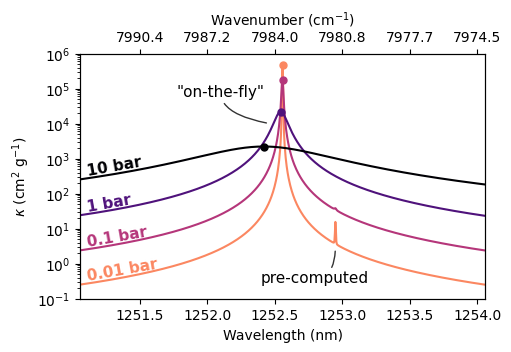

In [5]:
cmap = plt.get_cmap('magma_r')

labels = ['0.01', '0.1', '1', '10', '100']

fig, ax = plt.subplots(figsize=(5,3.5))

for i, opa_i in enumerate(opacity.T):
    c_i = cmap((i+1)/len(m_spec.pressure))

    ax.plot(1e3*wave_micron, opa_i, c=c_i, lw=1.5)
    ax.plot(1e3*wave_micron[np.argmax(opa_i)], np.max(opa_i), 'o', markersize=5, c=c_i)

    # Indicate the pressure
    x = 1251.1
    y = 10**(np.interp(x, 1e3*wave_micron, np.log10(opa_i))+0.1)
    ax.annotate(
        labels[i]+' bar', xy=(x, y), c=c_i, rotation=10, fontweight='bold', fontsize=11,
    )

# Add labels to two lines
ax.annotate(
    'pre-computed', xy=(1252.95,3), xytext=(1252.8,0.4), c='k', fontsize=11, ha='center', va='center', 
    arrowprops={
        'arrowstyle':'-', 'connectionstyle':'angle3,angleA=0,angleB=90', 
        'shrinkA':0, 'shrinkB':3, 'lw':1, 'color':'k', 'alpha':0.8, 
        }, 
)
ax.annotate(
    '"on-the-fly"', xy=(1252.47,1e4), xytext=(1252.1,8e4), c='k', fontsize=11, ha='center', va='center', 
    arrowprops={
        'arrowstyle':'-', 'connectionstyle':'angle3,angleA=90,angleB=-10', 
        'shrinkA':1, 'shrinkB':3, 'lw':1, 'color':'k', 'alpha':0.8, 
        }, 
)


xlim = 1e7/B_1.LineOpacity['J1226_1'][0].kwargs['custom_transitions'][0]['nu_0']
xlim += np.array([-1,1])*1.5

ax.set(
    yscale='log', ylim=(1e-1,1e6), ylabel=r'$\kappa\ (\mathrm{cm^2\ g^{-1}})$', 
    xticks=np.arange(1251,1255,0.5), xlim=xlim, xlabel=r'Wavelength (nm)', 
    )

ax_wn = ax.twiny()
ax_wn.set(
    xticks=ax.get_xticks(), xticklabels=['{:.1f}'.format(1e7/w_i) for w_i in ax.get_xticks()]
    )
ax_wn.set(xlim=xlim, xlabel=r'Wavenumber ($\mathrm{cm^{-1}}$)')

plt.subplots_adjust(left=0.15, right=0.96, top=0.86, bottom=0.16)
plt.savefig('./plots/J_band_opacity_treatment_new.pdf')
plt.show()